# Ознакомление с датасетом

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets


bank = pd.read_csv("data.csv")
bank.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


* **Children**  - кол-во детей
* **days** employed - как долго проработал клиент
* **dob** years - возраст
* **education** - образование 
* **education** id - идентификатор образования клиента
* **family_status** - семейное положение клиента
* **family_status_id** - идентификатор семейного положения клиента статус
* **Gender** - пол клиента
* **income_type** - тип дохода клиента
* **debt** - был ли у клиента когда-либо дефолт по кредиту
* **total_income** - ежемесячный доход
* **prupose** -  причина получения кредита

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
pd.concat([bank.dtypes, bank.isna().sum()], axis=1)

,0,1
children,int64,0
days_employed,float64,2174
dob_years,int64,0
education,object,0
education_id,int64,0
family_status,object,0
family_status_id,int64,0
gender,object,0
income_type,object,0
debt,int64,0


In [ ]:
bank.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


In [ ]:
(abs(bank["days_employed"])/365).describe()

count    19351.000000
mean       183.328024
std        380.906522
min          0.066141
25%          2.539751
50%          6.011563
75%         15.172281
max       1100.699727
Name: days_employed, dtype: float64

In [ ]:
bank[bank['days_employed'] < 0]['days_employed'].count()
bank[bank['days_employed'] >= 0]['days_employed'].apply(lambda x: x / 365).describe()

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

In [ ]:
bank[(abs(bank['days_employed']) <= 75*365)]['days_employed'].count()

15906

In [ ]:
from datetime import datetime, timedelta
import numpy as np
from math import isnan

OLE_TIME_ZERO = datetime(1899, 12, 30, 0, 0, 0)

def from_ole(ts:float)->datetime:
    if isnan(ts):
        return ts
    return OLE_TIME_ZERO + timedelta(days=float(ts/10))
def from_epoch(ts:float):
    if isnan(ts):
        return ts
    return datetime.fromtimestamp(ts*3600)
bank["days_employed"].min()
bank["days_employed"].max()
from_ole(bank["days_employed"].min())
from_ole(bank["days_employed"].max())
from_epoch(bank["days_employed"].min())
from_epoch(bank["days_employed"].max())
days = abs(bank["days_employed"])/abs(bank["days_employed"].min())
days.describe()

count    19351.000000
mean         3.638855
std          7.560567
min          0.001313
25%          0.050411
50%          0.119323
75%          0.301153
max         21.847653
Name: days_employed, dtype: float64

In [ ]:
bank["date_employed"] = bank.apply(lambda row: from_ole(abs(row["days_employed"])), axis=1)

In [ ]:
bank[["date_employed", "dob_years"]].sample(15)

,date_employed,dob_years
21512,1900-01-15 12:54:23.775995,26
3865,NaT,50
18404,1900-02-24 03:09:14.262373,46
17422,1902-08-06 20:32:38.363263,48
9927,1901-05-28 23:14:54.550159,43
20491,1900-06-25 19:07:11.047589,41
9588,1900-06-23 21:41:28.608709,0
19698,1902-09-28 05:18:01.785777,50
18857,2009-04-12 13:38:36.850711,56
6509,1900-06-02 05:51:46.326443,43


In [ ]:
bank["date_employed"] = bank.apply(lambda row: from_epoch(abs(row["days_employed"])), axis=1)
bank[["date_employed", "dob_years"]].sample(5)

,date_employed,dob_years
15929,1971-01-07 19:42:35.433596,42
6931,1970-05-14 05:43:57.355651,51
17373,1970-04-24 17:39:29.752285,38
11476,1970-01-12 10:24:18.537311,28
8175,1970-04-24 15:54:22.147390,60


In [ ]:
bank = bank.drop('date_employed', axis=1)
bank.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
duplicates = bank[bank.duplicated()]
100*len(duplicates)/len(bank)

0.2508710801393728

# Итог ознакомления

* пропущено около 10% данных в столбцах "days_employed", "income_type"
* days_employed" - неверный столбец, он не может быть отрицательным, и у него неизвестная мера исчесления. Максимальное значение равно 401755, для дней это более 1100 лет. 
* в days_employed пропущено 2174 значения (10,1%)
* нужно классифицировать данные
* датасет содержит 54 (0,3%) повторяющихся строки
* максимальное значение в столбце children  равен -1, что является невозможным, а максимальное равно 20, что выглядит очень маловероятно 
* dob_years -  min=0 а такое невозможно


# Предобработка датасета

работаем с пустыми значениями

In [ ]:
total = bank.isnull().sum().sort_values(ascending=False)
percent = (bank.isnull().sum()/bank.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
days_employed,2174,10.099884
total_income,2174,10.099884


In [ ]:
df_nan = bank[bank['total_income'].isna()]
df_nan.groupby('education_id')['education_id'].count()

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

In [ ]:
bank[bank['days_employed'].isnull()].sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7564,1,NaN,31,среднее,1,гражданский брак,1,F,компаньон,0,NaN,получение высшего образования
15214,3,NaN,36,среднее,1,гражданский брак,1,F,сотрудник,1,NaN,сделка с автомобилем
9387,0,NaN,59,среднее,1,женат / замужем,0,F,пенсионер,0,NaN,получение высшего образования
12451,0,NaN,25,среднее,1,гражданский брак,1,M,сотрудник,0,NaN,ремонт жилью
11115,0,NaN,46,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,операции с недвижимостью
3290,0,NaN,58,Среднее,1,гражданский брак,1,F,пенсионер,0,NaN,сыграть свадьбу
11091,0,NaN,55,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,покупка жилья для сдачи
6350,0,NaN,52,среднее,1,вдовец / вдова,2,F,сотрудник,0,NaN,сделка с подержанным автомобилем
15355,0,NaN,62,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка коммерческой недвижимости
6693,0,NaN,37,среднее,1,гражданский брак,1,F,сотрудник,1,NaN,на проведение свадьбы


In [ ]:
bank[bank['days_employed'].isna()].pivot_table(index='income_type',values='total_income' ,aggfunc='count')

,total_income
income_type,
госслужащий,0
компаньон,0
пенсионер,0
предприниматель,0
сотрудник,0


In [ ]:
median_income_type = bank.groupby('income_type').agg({'total_income': 'mean'}).reset_index()
median_income_type

,income_type,total_income
0,безработный,131339.751676
1,в декрете,53829.130729
2,госслужащий,170898.309923
3,компаньон,202417.461462
4,пенсионер,137127.465690
5,предприниматель,499163.144947
6,сотрудник,161380.260488
7,студент,98201.625314


In [ ]:
replacer_map = {row["income_type"]:row["total_income"] for i, row in median_income_type.iterrows()}
bank['total_income'] = bank['total_income'].fillna(bank["income_type"].map(replacer_map))
bank[bank['days_employed'].isnull()].sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20140,0,NaN,36,высшее,0,гражданский брак,1,F,компаньон,0,202417.461462,сыграть свадьбу
4073,0,NaN,48,среднее,1,женат / замужем,0,F,сотрудник,0,161380.260488,операции с жильем
10847,0,NaN,38,среднее,1,гражданский брак,1,F,сотрудник,0,161380.260488,приобретение автомобиля
13270,0,NaN,50,высшее,0,женат / замужем,0,F,компаньон,0,202417.461462,ремонт жилью
13292,0,NaN,32,среднее,1,женат / замужем,0,F,сотрудник,0,161380.260488,сделка с автомобилем


In [ ]:
bank[bank['days_employed'].isnull()]['total_income'].value_counts()

161380.260488    1105
202417.461462     508
137127.465690     413
170898.309923     147
499163.144947       1
Name: total_income, dtype: int64

In [ ]:
bank[bank['days_employed'].isnull()]['debt'].value_counts()

0    2004
1     170
Name: debt, dtype: int64

In [ ]:
def fill_days_employed():
    global bank
    fillna_value("days_employed", bank['days_employed'].median())
def fillna_value(column, value):
    global bank
    bank[column].fillna(value, inplace=True)

In [ ]:
bank = bank[pd.notnull(bank['days_employed'])]
bank.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
bank.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,19351.000000,19351.000000,19351.000000,19351,19351.000000,19351,19351.000000,19351,19351,19351.000000,1.935100e+04,19351
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,12342,NaN,11143,NaN,12752,10014,NaN,NaN,721
mean,0.537388,63046.497661,43.255336,NaN,0.819079,NaN,0.972249,NaN,NaN,0.081184,1.674223e+05,NaN
std,1.371408,140827.311974,12.579170,NaN,0.550104,NaN,1.420596,NaN,NaN,0.273125,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


исправим детей)

> 
заменим -1 на 1 а 20 на 2 



In [ ]:
bank['children'] = bank['children'].replace(-1, 1)
bank['children'] = bank['children'].replace(20, 2)
bank['days_employed']= abs(bank['days_employed'])
bank['gender'].unique()
bank[bank['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [ ]:
income_type = bank[bank['gender']=='XNA'].reset_index()['income_type'][0]
bank[bank['income_type'] == income_type].shape
bank.groupby('income_type').agg(['mean', 'count'])

<ipython-input-321-c2db9b86b14c>:3: FutureWarning: ['education', 'family_status', 'gender', 'purpose'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  bank.groupby('income_type').agg(['mean', 'count'])


children         days_employed         dob_years         \
                     mean  count           mean  count       mean  count   
income_type                                                                
безработный      0.500000      2  366413.652744      2  38.000000      2   
в декрете        2.000000      1    3296.759962      1  39.000000      1   
госслужащий      0.607470   1312    3399.896902   1312  40.570122   1312   
компаньон        0.525672   4577    2111.524398   4577  39.654359   4577   
пенсионер        0.095556   3443  365003.491245   3443  59.137090   3443   
предприниматель  0.000000      1     520.848083      1  27.000000      1   
сотрудник        0.573797  10014    2326.499216  10014  39.797783  10014   
студент          0.000000      1     578.751554      1  22.000000      1   

                education_id        family_status_id             debt         \
                        mean  count             mean  count      mean  count   
income_type                                                                    
безработный         0.500000      2         0.500000      2  0.500000      2   
в декрете           1.000000      1         0.000000      1  1.000000      1   
госслужащий         0.674543   1312         0.847561   1312  0.060213   1312   
компаньон           0.720122   4577         1.027747   4577  0.075595   4577   
пенсионер           0.914900   3443         0.984606   3443  0.052570   3443   
предприниматель     0.000000      1         1.000000      1  0.000000      1   
сотрудник           0.850509  10014         0.958858  10014  0.096165  10014   
студент             0.000000      1         4.000000      1  0.000000      1   

                  total_income         
                          mean  count  
income_type                            
безработный      131339.751676      2  
в декрете         53829.130729      1  
госслужащий      170898.309923   1312  
компаньон        202417.461462   4577  
пенсионер        137127.465690   3443  
предприниматель  499163.144947      1  
сотрудник        161380.260488  10014  
студент           98201.625314      1

In [ ]:
bank = bank[bank['gender'] != 'XNA']
bank[bank['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


## Замена типа данных

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19350 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19350 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         19350 non-null  int64  
 3   education         19350 non-null  object 
 4   education_id      19350 non-null  int64  
 5   family_status     19350 non-null  object 
 6   family_status_id  19350 non-null  int64  
 7   gender            19350 non-null  object 
 8   income_type       19350 non-null  object 
 9   debt              19350 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           19350 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [ ]:
bank['days_employed'].sample(5)

9216      667.873467
15402    1708.310515
11471    1756.018380
8734     2358.122341
13777    8104.487413
Name: days_employed, dtype: float64

In [ ]:
bank['total_income'].sample(5)

4790      50451.229671
5406      97645.172795
979      412127.334046
7488     205953.307455
11667    174534.064785
Name: total_income, dtype: float64

In [ ]:
bank['total_income'].dtypes

dtype('float64')

In [ ]:
bank['days_employed'] = bank['days_employed'].astype(int, errors='ignore')
bank['total_income'] = bank['total_income'].astype(int, errors='ignore')

In [ ]:
bank['total_income'].dtypes

dtype('int64')

## Обработка дубликатов

In [ ]:
bank['education'].value_counts()

среднее                12342
высшее                  4222
СРЕДНЕЕ                  705
Среднее                  646
неоконченное высшее      612
ВЫСШЕЕ                   251
Высшее                   243
начальное                231
Неоконченное высшее       40
НЕОКОНЧЕННОЕ ВЫСШЕЕ       22
НАЧАЛЬНОЕ                 16
Начальное                 14
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [ ]:
def to_case():
    global bank
    bank['education'] = bank['education'].str.lower()
    bank['family_status'] = bank['family_status'].str.lower()
    bank['gender'] = bank['gender'].str.upper()
    bank['income_type'] = bank['income_type'].str.lower()
    bank['purpose'] = bank['purpose'].str.lower()

In [ ]:
to_case()

In [ ]:
bank.duplicated().sum()
bank[bank.duplicated()].sort_values('education').head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [ ]:
bank = bank.drop_duplicates().reset_index(drop=True)
bank.duplicated().sum()

0

# Классификация

In [ ]:
from sklearn.metrics import classification_report
display(bank.head())
bank.describe()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19350.000000,19350.000000,19350.000000,19350.000000,19350.000000,19350.000000,1.935000e+04
mean,0.479638,66917.565840,43.256331,0.819018,0.972248,0.081189,1.674199e+05
std,0.753906,139033.697915,12.578734,0.550053,1.420633,0.273132,1.029739e+05
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,926.250000,33.000000,1.000000,0.000000,0.000000,1.030405e+05
50%,0.000000,2194.000000,42.000000,1.000000,0.000000,0.000000,1.450110e+05
75%,1.000000,5537.500000,53.000000,1.000000,1.000000,0.000000,2.034235e+05
max,5.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


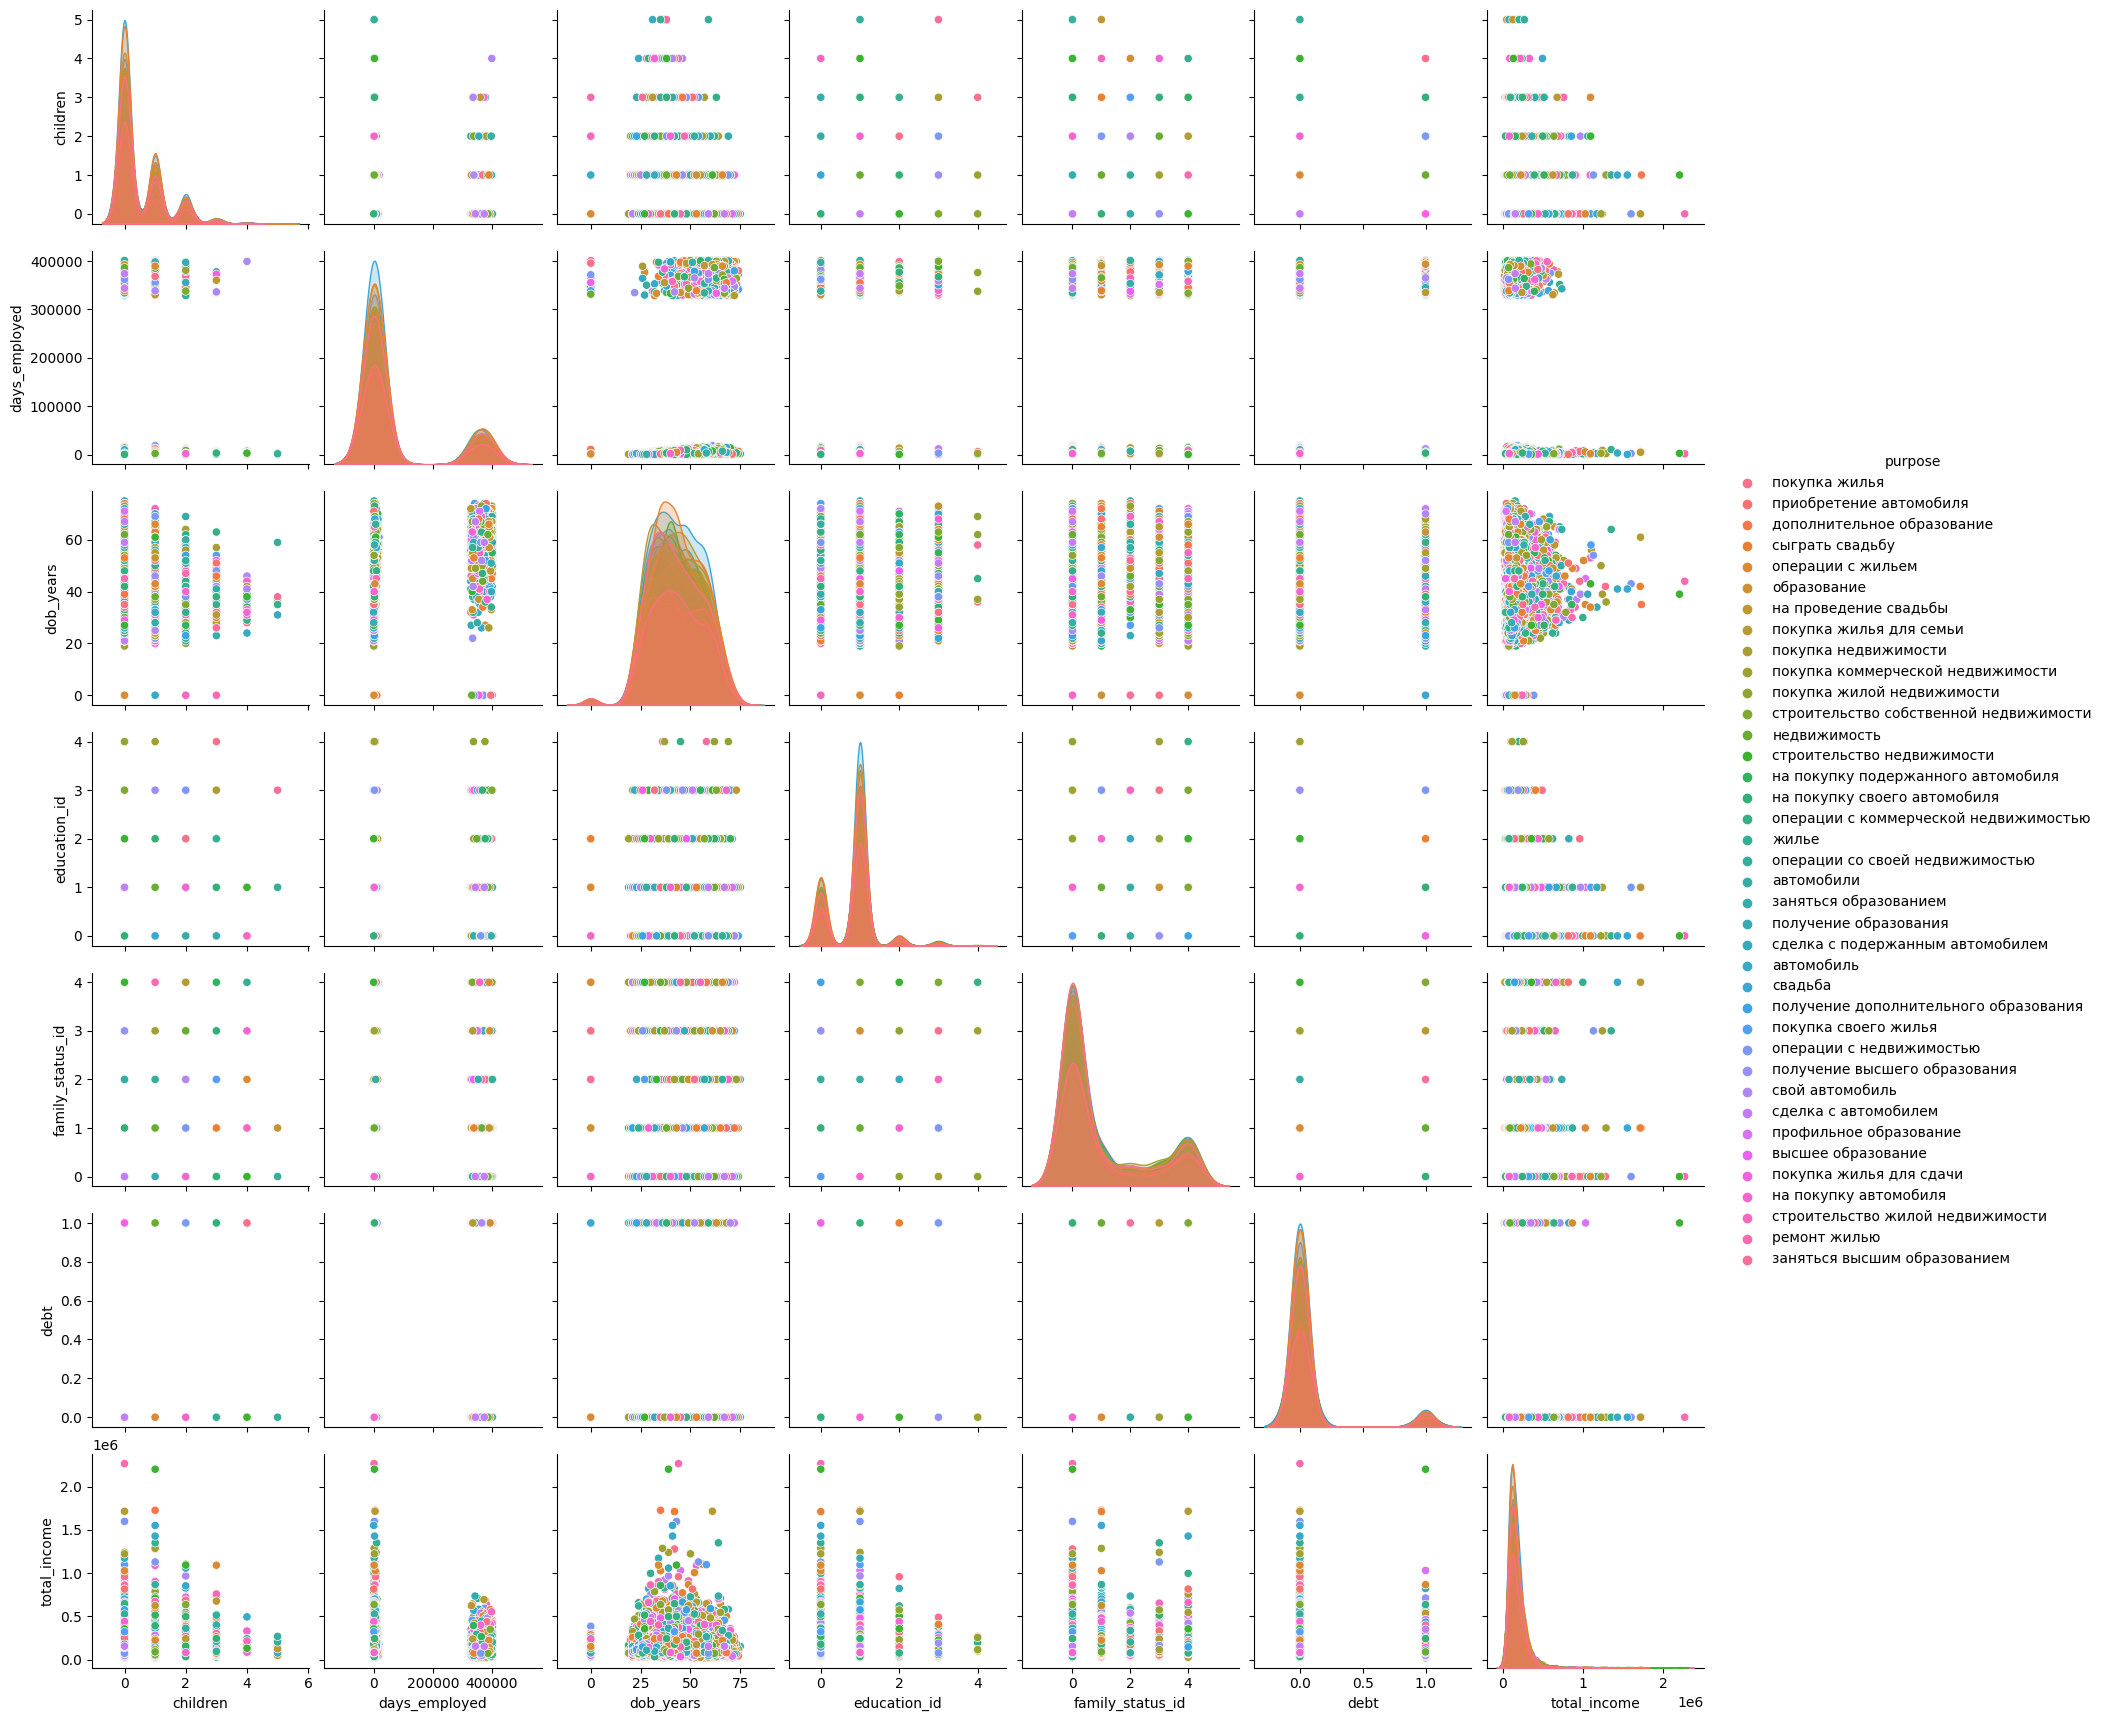

In [ ]:
sns.pairplot(bank, hue="purpose")

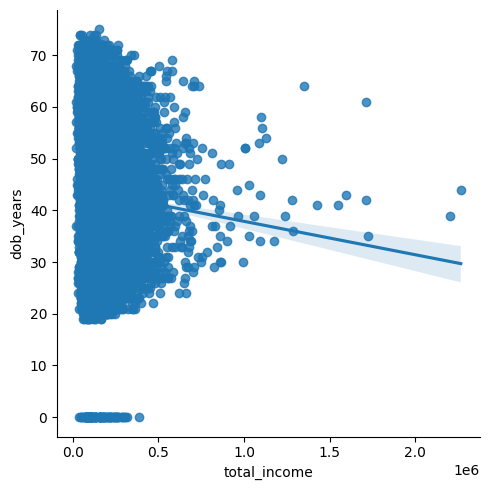

In [ ]:
sns.lmplot(x="total_income", y="dob_years", data=bank)

In [ ]:
X = bank.iloc[:,[2,10]].values
y = bank['purpose'].values

In [ ]:
y[:]

array(['покупка жилья', 'приобретение автомобиля', 'покупка жилья', ...,
       'недвижимость', 'на покупку своего автомобиля',
       'на покупку автомобиля'], dtype=object)

In [ ]:
X[:]

array([[    42, 253875],
       [    36, 112080],
       [    33, 145885],
       ...,
       [    38,  89672],
       [    38, 244093],
       [    40,  82047]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

Ts = LabelEncoder()
Ts.fit(y)
y = Ts.transform(y)
y[:5]  

array([18, 27, 18,  3, 37])

In [ ]:
bank_pred_names = Ts.classes_
bank_pred_names

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train[:5], X_train_std[:5]

(array([[    32,  98540],
        [    36,  99041],
        [    60,  63330],
        [    63,  81298],
        [    22, 128609]]),
 array([[-0.89322383, -0.66354267],
        [-0.57515253, -0.65870699],
        [ 1.33327531, -1.00339134],
        [ 1.57182879, -0.82996331],
        [-1.68840209, -0.37331518]]))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[0.02108159, 0.02309443, 0.02126472, 0.02245516, 0.02825537,
        0.02780458, 0.01958644, 0.02112747, 0.02390065, 0.02188999,
        0.0361248 , 0.0278409 , 0.02167271, 0.02943149, 0.02867773,
        0.03131115, 0.03003899, 0.02756084, 0.02948557, 0.0328212 ,
        0.02955343, 0.02994396, 0.02624018, 0.02782464, 0.01988866,
        0.02072938, 0.01959893, 0.02058847, 0.02061205, 0.02595063,
        0.04123359, 0.0230925 , 0.02270006, 0.02249074, 0.02984581,
        0.02904646, 0.02891645, 0.03631827],
       [0.02200256, 0.0255359 , 0.02346567, 0.0230446 , 0.0301474 ,
        0.01659494, 0.01843995, 0.02512639, 0.02541589, 0.02375189,
        0.03429281, 0.02633009, 0.02141199, 0.0346486 , 0.03049374,
        0.02917953, 0.02907907, 0.03072071, 0.02810606, 0.0266209 ,
        0.02778321, 0.03237444, 0.03335335, 0.03044045, 0.02072398,
        0.01829049, 0.01991709, 0.02095073, 0.0203193 , 0.03168404,
        0.03435064, 0.01867836, 0.01910716, 0.02301166, 0.02976442,
   

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)


array([1., 1., 1.])

In [ ]:
y_test[:3]

array([35, 23, 34])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([30, 37, 30])

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([30])

In [ ]:
X_test_std[0, :]

array([-0.01852774, -1.02161441])

In [ ]:
X_test_std[0, :].reshape(1, -1)

array([[-0.01852774, -1.02161441]])

In [ ]:
y_pred = lr.predict(X_test_std)

In [ ]:
len(bank_pred_names)

38

In [ ]:
print(classification_report(y_test, y_pred, target_names=bank_pred_names))

                                        precision    recall  f1-score   support

                            автомобили       0.00      0.00      0.00       131
                            автомобиль       0.00      0.00      0.00       131
                    высшее образование       0.00      0.00      0.00       110
            дополнительное образование       0.00      0.00      0.00       108
                                 жилье       0.00      0.00      0.00       184
          заняться высшим образованием       0.00      0.00      0.00       131
                 заняться образованием       0.00      0.00      0.00        99
                 на покупку автомобиля       0.00      0.00      0.00       135
    на покупку подержанного автомобиля       0.00      0.00      0.00       109
          на покупку своего автомобиля       0.00      0.00      0.00       142
                 на проведение свадьбы       0.06      0.02      0.03       203
                          недвижимость 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Метод опорных векторов (SVC)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
y_pred_svm = svm.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_pred_svm, target_names=bank_pred_names))

                                        precision    recall  f1-score   support

                            автомобили       0.00      0.00      0.00       131
                            автомобиль       0.00      0.00      0.00       131
                    высшее образование       0.00      0.00      0.00       110
            дополнительное образование       0.00      0.00      0.00       108
                                 жилье       0.00      0.00      0.00       184
          заняться высшим образованием       0.00      0.00      0.00       131
                 заняться образованием       0.00      0.00      0.00        99
                 на покупку автомобиля       0.00      0.00      0.00       135
    на покупку подержанного автомобиля       0.00      0.00      0.00       109
          на покупку своего автомобиля       0.00      0.00      0.00       142
                 на проведение свадьбы       0.00      0.00      0.00       203
                          недвижимость 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Нелинейная классификация

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_rbf.fit(X_train_std, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [ ]:
y_pred_svm_rbf = svm_rbf.predict(X_test_std)
print(classification_report(y_test, y_pred_svm_rbf, target_names=bank_pred_names))

                                        precision    recall  f1-score   support

                            автомобили       0.00      0.00      0.00       131
                            автомобиль       0.00      0.00      0.00       131
                    высшее образование       0.00      0.00      0.00       110
            дополнительное образование       0.00      0.00      0.00       108
                                 жилье       0.00      0.00      0.00       184
          заняться высшим образованием       0.00      0.00      0.00       131
                 заняться образованием       0.00      0.00      0.00        99
                 на покупку автомобиля       0.00      0.00      0.00       135
    на покупку подержанного автомобиля       0.00      0.00      0.00       109
          на покупку своего автомобиля       0.00      0.00      0.00       142
                 на проведение свадьбы       0.04      0.04      0.04       203
                          недвижимость 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Деревья принятия решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
y_pred_tree = tree.predict(X_test_std)
print(classification_report(y_test, y_pred_tree, target_names=bank_pred_names))

                                        precision    recall  f1-score   support

                            автомобили       0.00      0.00      0.00       131
                            автомобиль       0.00      0.00      0.00       131
                    высшее образование       0.00      0.00      0.00       110
            дополнительное образование       0.00      0.00      0.00       108
                                 жилье       0.07      0.01      0.02       184
          заняться высшим образованием       0.00      0.00      0.00       131
                 заняться образованием       0.00      0.00      0.00        99
                 на покупку автомобиля       0.00      0.00      0.00       135
    на покупку подержанного автомобиля       0.00      0.00      0.00       109
          на покупку своего автомобиля       0.00      0.00      0.00       142
                 на проведение свадьбы       0.03      0.16      0.05       203
                          недвижимость 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip3 install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=bank_pred_names,
                           feature_names=['total_income ', 
                                          'dob_years'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('tree.png')

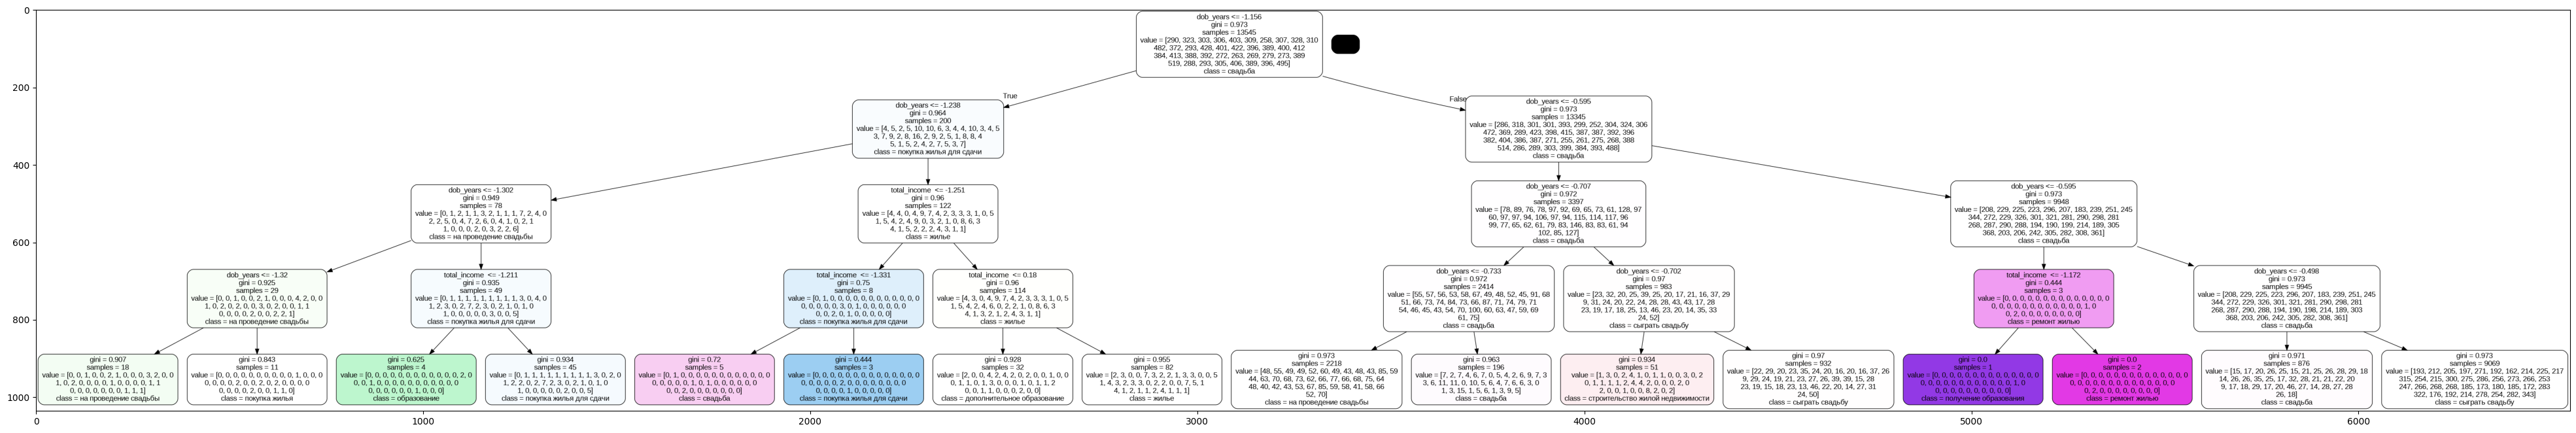

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot()
ax.imshow(img)
 
plt.show()

## Метод k-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='manhattan')
knn.fit(X_train_std, y_train)

y_pred_knn = knn.predict(X_test_std)
print(classification_report(y_test, y_pred_knn, target_names=bank_pred_names))

                                        precision    recall  f1-score   support

                            автомобили       0.02      0.09      0.04       131
                            автомобиль       0.03      0.11      0.05       131
                    высшее образование       0.02      0.07      0.03       110
            дополнительное образование       0.02      0.06      0.03       108
                                 жилье       0.03      0.07      0.04       184
          заняться высшим образованием       0.04      0.10      0.06       131
                 заняться образованием       0.02      0.04      0.02        99
                 на покупку автомобиля       0.04      0.08      0.05       135
    на покупку подержанного автомобиля       0.01      0.04      0.02       109
          на покупку своего автомобиля       0.02      0.03      0.02       142
                 на проведение свадьбы       0.02      0.03      0.03       203
                          недвижимость 